# LLRB Trees

The LLRB Tree (left-leaning red-black tree) is a data structure, i.e. a way to store data that supports certain operations.

A tree is a structure that saves data in nodes, which are pairs of keys and values. It must have a root node which has no parent node, and is linked to children that are also nodes, which can be linked to ther nodes and so on.

This tree is binary, which means that any node can only have two children, if it doesn't have a node in one of its two vacants we will call that a leaf.

The ordering of the tree is achieved via the keys. In this case, the left child has a lesser value, the right one is greater and if the key is the same we replace the corresponding value.
<img src="binary_ex.svg" height=100px width=100px>

The main idea behind these trees is to keep them balanced. That is that any path of black nodes from the root of the tree to a leaf  is of the same length.

# Basic Operations

In [121]:
include("llrbtree.jl")

LLRBTrees

In [122]:
function populate(tree::LLRBTrees.LLRBTree, N::Int64)
    srand(2)
    for i in 1:N
        r = rand(0:100)
        push!(tri, r, r )
    end
end

populate (generic function with 6 methods)

In [138]:
tri=LLRBTrees.LLRBTree()

LLRBTrees.LLRBTree(LLRBTrees.TreeLeaf(false))

In [139]:
populate(tri,30)

# Visualization

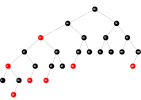

In [140]:
treevisual=LLRBTrees.LLRBVisualize.drawtree(tri)

In [158]:
p=pointer_from_objref(tri.root.left)
call(p, LLRBTrees.TreeLeaf())

LoadError: LoadError: MethodError: `call` has no method matching call(::Ptr{Void}, ::LLRBTrees.TreeLeaf)
Closest candidates are:
  BoundsError()
  BoundsError(!Matched::Any...)
  DivideError()
  ...
while loading In[158], in expression starting on line 2

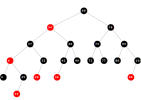

In [143]:
function compress(node)
    n = pointer_from_objref
    tri.root.left = getchild(node)
end

function getchild(node)
    son = node.left
    return son
end

compress(tri.root.left)
treevisual=LLRBTrees.LLRBVisualize.drawtree(tri)

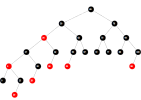

In [132]:
node = tri.root.left.left
node = LLRBTrees.rotateleft(tri.root.left.left)
#print(tri.root.left.left)
LLRBTrees.LLRBVisualize.drawtree(tri)

In [84]:
trid=LLRBTrees.LLRBTree[]
delete!(tri, 48, trid)

Entered node


LoadError: LoadError: KeyError: 48 not found
while loading In[84], in expression starting on line 2

* Continue search if left is present
Remove from left recursion
Entered node
* Continue search if left is present
Remove from left recursion
Entered node
Flip a 3 node or unbalance a 4 node
* Continue search if right is present
Entered node
* Continue search if right is present
moved to the right
Entered node
* Continue search if right is present
Entered node
Left node was leaf so key cannot be here


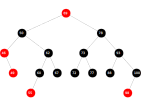

In [90]:
treevisual=LLRBTrees.LLRBVisualize.drawtree(trid[1])

In [42]:
trid

1-element Array{LLRBTrees.LLRBTree,1}:
 LLRBTrees.LLRBTree(LLRBTrees.TreeNode{Int64,Int64}(69,69,true,LLRBTrees.TreeNode{Int64,Int64}(50,50,false,LLRBTrees.TreeNode{Int64,Int64}(34,34,true,LLRBTrees.TreeNode{Int64,Int64}(32,32,false,LLRBTrees.TreeNode{Int64,Int64}(28,28,true,LLRBTrees.TreeLeaf(false),LLRBTrees.TreeLeaf(false)),LLRBTrees.TreeLeaf(false)),LLRBTrees.TreeNode{Int64,Int64}(46,46,true,LLRBTrees.TreeNode{Int64,Int64}(42,42,false,LLRBTrees.TreeNode{Int64,Int64}(38,38,true,LLRBTrees.TreeLeaf(false),LLRBTrees.TreeLeaf(false)),LLRBTrees.TreeLeaf(false)),LLRBTrees.TreeNode{Int64,Int64}(49,49,false,LLRBTrees.TreeLeaf(false),LLRBTrees.TreeLeaf(false)))),LLRBTrees.TreeNode{Int64,Int64}(62,62,false,LLRBTrees.TreeNode{Int64,Int64}(60,60,false,LLRBTrees.TreeNode{Int64,Int64}(55,55,true,LLRBTrees.TreeLeaf(false),LLRBTrees.TreeLeaf(false)),LLRBTrees.TreeLeaf(false)),LLRBTrees.TreeNode{Int64,Int64}(67,67,false,LLRBTrees.TreeLeaf(false),LLRBTrees.TreeLeaf(false)))),LLRBTrees.TreeNode{Int64,

It's an svg so we can do infinite zooming

In [ ]:
using Compose

In [ ]:
img = SVG("binary_ex.svg", 10cm, 10cm)
draw(img, treevisual)

# Unit tests

In [ ]:
include("llrbtree.jl")
using LLRBTrees

In [ ]:
function populate(tree::LLRBTrees.LLRBTree, N::Int64)
    for i in 1:N
        r = rand(0:100)
        push!(tri, r, r*2 )
    end
end
tri=LLRBTrees.LLRBTree()
populate(tri,30)

In [ ]:
function check_height(node::TreeNode, prevheight::Int=0, height::Int=0, first::Bool=true)
    if( !node.isRed ) height += 1 end
    check=true
    
    if(!isa(node.left, TreeLeaf))
        check, prevheight = check_height(node.left, prevheight, height, first)
    end
    
    if(!check)
        return false, prevheight
    end
    
    if( isa(node.left, TreeLeaf) && isa(node.right, TreeLeaf))
        if (height != prevheight && !first)
            return false, prevheight
        end
        prevheight = height
    end
    first=false
    
    if(!isa(node.right, TreeLeaf))
        check, prevheight = check_height(node.right, prevheight, height, first)
    end
    
    return check, prevheight
    
end
check_height(tree::LLRBTree) = check_height(tree.root)[1]

In [ ]:
check_height(tri)

In [ ]:
tri.root.left.isRed=true

In [ ]:
check_height(tri)

In [ ]:
isa(delete!(tri, 16), LLRBTree)

# Random Scenarios

In [ ]:
include("llrbtree.jl")
import FactCheck
using LLRBTrees
using LLRBTrees.LLRBVisualize
using Compose

function check_height(node::TreeNode, prevheight::Int=0, height::Int=0, first::Bool=true)
    if( !node.isRed ) height += 1 end
    check=true
    
    if(!isa(node.left, TreeLeaf))
        check, prevheight = check_height(node.left, prevheight, height, first)
    end
    
    if(!check)
        return false, prevheight
    end
    
    if( isa(node.left, TreeLeaf) && isa(node.right, TreeLeaf))
        if (height != prevheight && !first)
            return false, prevheight
        end
        prevheight = height
    end
    first=false
    
    if(!isa(node.right, TreeLeaf))
        check, prevheight = check_height(node.right, prevheight, height, first)
    end
    
    return check, prevheight
    
end
check_height(tree::LLRBTree) = check_height(tree.root)[1]

In [ ]:
function populate(tree::LLRBTree, N::Int64)
    for i in 1:N
        r = rand(0:100)
        push!(tri, r, r*2 )
    end
end
tri=LLRBTree()
populate(tri,30)
vis=drawtree(tri)
img = SVG("test1.svg", 10cm, 10cm)
draw(img, vis)

In [ ]:
function checktree(tree::LLRBTree, elements::Array{TreeNode,1})

    FactCheck.@fact tree --> check_height "not balanced"
    #order
    #no consecutive red nodes
    #left leaning
    
end

In [ ]:
function randomscenarios(seed::Int=1, scenarios::Int=3)
    #Fixed seed for reproducability
    srand(seed)
    
    
    FactCheck.facts("Test differents scenarios") do
        for i in 1:scenarios
            elementsMax = rand(1:20)
            keysmax = rand(1:10)
            valuesmax = rand(1:10)

            tree = LLRBTree()
            elements = TreeNode[]

            FactCheck.context("Add random values") do
                for i in 1:elementsMax
                    node = TreeNode(rand(1:keysmax), rand(1:valuesmax) )
                    
                    push!(tree, node)
                    
                    indexes = Int[]
                    for j in 1:size(elements)[1]
                        nd = elements[j]
                        if nd.key ==  node.key
                            push!(indexes, j)
                        end
                    end
                    deleteat!(elements, indexes)
                    push!(elements, node)
                    
                    checktree(tree, elements)
                end
            end
            println(elements)
            println(tree)
            vis=drawtree(tree)
            img = SVG("test1.svg", 10cm, 10cm)
            draw(img, vis)

            #Try to remove some keys that aren't present
            FactCheck.context("Remove keys not present") do
                removesMax = rand(1:20)
                for i in 1:removesMax
                    println("delete: ",i, " ", )
                    FactCheck.@fact_throws KeyError delete!(tree, rand(51:100)) "Key wasn't present but KeyError wasn't thrown"
                end
            end
            println(tree)
            vis=drawtree(tree)
            img = SVG("test2.svg", 10cm, 10cm)
            draw(img, vis)
            
            #Remove all keys in random order
            FactCheck.context("Remove all keys") do
                while( size(elements)[1] > 0 )
                    index = rand(1:size(elements)[1])
                    println(elements[index])
                    FactCheck.@fact isa(delete!( tree, elements[index].key ), LLRBTree) --> true  "Did not return the tree with deleted node"
                    deleteat!(elements, index)

                    checktree(tree, elements)
                end
            end

        end
    end
end

In [ ]:
randomscenarios()